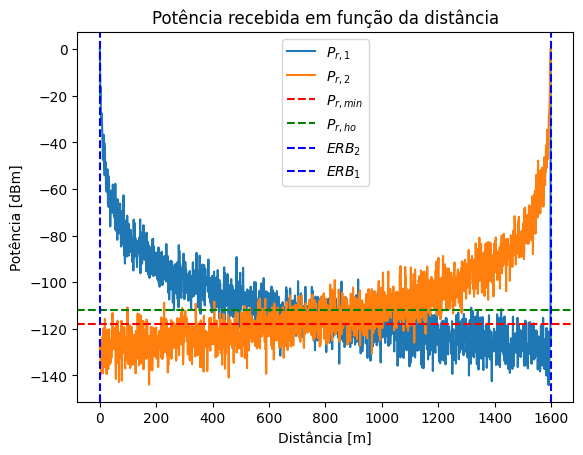

In [14]:
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import erfc

n = 4 # Expoente de perda de percurso
sigma = 6 # Desvio padrão [dB]
P_0 = 0 # Potência do sinal [dBm]
d_0 = 1 # Distância de referência [m]
P_r_min = -118 # Potência mínima recebida [dBm]
P_r_ho = -112 # Limiar de Handoff [dBm]
d_max = 1600 # Distância máxima [m]

P_r_1 = np.zeros(d_max)
P_r_2 = np.zeros(d_max)

for d_1 in range(d_max - 1):
    d_1 = d_1 + 1
    P_r_1[d_1 - 1] = P_0 - 10*n*np.log10(d_1/d_0) + np.random.normal(0, sigma)
    
    d_2 = d_max - d_1 
    P_r_2[d_1 - 1] = P_0 - 10*n*np.log10(d_2/d_0) + np.random.normal(0, sigma)

plt.figure()

plt.plot(P_r_1, label='$P_{r,1}$')
plt.plot(P_r_2, label='$P_{r,2}$')

plt.axhline(y=P_r_min, color='r', linestyle='--', label='$P_{r,{min}}$')
plt.axhline(y=P_r_ho, color='g', linestyle='--', label='$P_{r,{ho}}$')
plt.axvline(x=d_max, color='b', linestyle='--', label='$ERB_{2}$')  
plt.axvline(x=0, color='b', linestyle='--', label='$ERB_{1}$')  

plt.xlabel('Distância [m]')
plt.ylabel('Potência [dBm]')
plt.title('Potência recebida em função da distância')
plt.legend()

plt.show()

In [15]:
def qfunc(x):
    return 0.5 * erfc(x / np.sqrt(2))

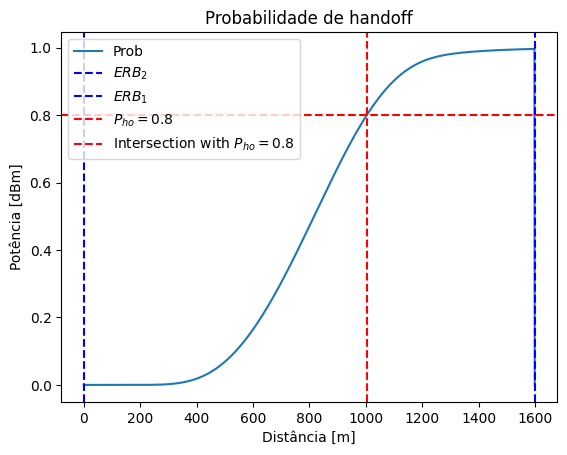

In [30]:
mu = np.zeros((d_max, 2))
prob = np.zeros(d_max)

for d_1 in range(d_max - 1):
    d_1 = d_1 + 1
    mu[d_1 - 1, 0] = P_0 - 10*n*np.log10(d_1/d_0) 
    
    d_2 = d_max - d_1 
    mu[d_1 - 1, 1] = P_0 - 10*n*np.log10(d_2/d_0)

    prob[d_1 - 1] = qfunc((mu[d_1 - 1, 0] - P_r_ho) / sigma) * qfunc((P_r_min - mu[d_1 - 1, 1]) / sigma)

qfunc((mu-P_r_ho) / sigma), qfunc((mu-P_r_min) / sigma)

plt.figure()

plt.plot(prob, label='Prob')

plt.axvline(x=d_max, color='b', linestyle='--', label='$ERB_{2}$')
plt.axvline(x=0, color='b', linestyle='--', label='$ERB_{1}$')
plt.axhline(y=0.8, color='r', linestyle='--', label='$P_{ho} = 0.8$')
plt.axvline(x=np.argmax(prob >= 0.8), color='r', linestyle='--', label='Intersection with $P_{ho} = 0.8$')


plt.xlabel('Distância [m]')
plt.ylabel('Potência [dBm]')

plt.title('Probabilidade de handoff')
plt.legend()

plt.show()